In [1]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/nasedkn/Software/MultiNest/lib'
import species
import requests
import urllib
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
from spectres import spectres
from astropy.io import fits
species.SpeciesInit()


Initiating species v0.5.5... [DONE]
Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Grid interpolation method: linear


In [2]:
# photometry for planets b, c, d, e, u, f (rows)
# filters F1065C F1140C F1550C F2100W (columns)
#2.681941949177386450e-18    2.046528758471888180e-18    5.846118793195905932e-19    inf
#4.966086415379789477e-18    3.472101819699050808e-18    9.133572667377022493e-19    inf
#4.193031632400687911e-18    3.354398742301628024e-18    2.905771874569003489e-18    inf
#3.404847448869381943e-18    3.256655933358654747e-18    3.531686802640035094e-18    inf

#2.928541924716580384e-18    2.377450746037830577e-18    8.588493213032265449e-19    inf
#5.841480533492277999e-18    4.377636367477847146e-18    3.404913166860515887e-18    inf
#5.300163342989546421e-18    4.155088160040220885e-18    4.334084965126299336e-18    inf
#6.469674093754981439e-18    5.113087972694229049e-18    8.156270684246423934e-18    inf

#F1065C = 3.404847448869381943e-18
#F1065C_err = 6.469674093754981439e-18/2
#F1140C = 3.256655933358654747e-18
#F1140C_err = 5.113087972694229049e-18/2
#F1550C = 5.846118793195905932e-19
#F1550C_err = 8.588493213032265449e-19
#F1065C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1065C')
#F1140C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1140C')
#F1550C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1550C')
#test_synphot = species.SyntheticPhotometry('Keck/NIRC2.Ms')
#F1065C_app_mag, abs_mag = F1065C_synphot.flux_to_magnitude(F1065C, error=F1065C_err, distance=(41.2925, 0.25))
#F1140C_app_mag, abs_mag = F1140C_synphot.flux_to_magnitude(F1140C, error=F1140C_err, distance=(41.2925, 0.25))
#F1550C_app_mag, abs_mag = F1550C_synphot.flux_to_magnitude(F1550C*2, error=F1550C_err, distance=(41.2925, 0.25))
#test,_ = test_synphot.flux_to_magnitude(F1140C*2, error=F1140C_err, distance=(41.2925, 0.25))
#Apparent magnitude = 16.05 +/- 0.30
#Flux (W m-2 um-1) = 8.87e-18 +/- 2.48e-18
#print(F1065C_app_mag,F1140C_app_mag)


In [3]:
database = species.Database()
database.add_photometry('vlm-plx')

#database.add_model(model='drift-phoenix', teff_range=(700., 1700.))
#database.add_model(model='exo-rem', teff_range=(700., 1700.))
#database.add_model(model='petitcode-cool-cloudy', teff_range=(700., 1700.))
database.add_model(model='petitcode-hot-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-clear', teff_range=(700., 1700.))
#database.add_model(model='sonora-bobcat', teff_range=(700., 1700.))
#database.add_model(model='petrus2023', teff_range=(700., 1700.))



Adding Database of Ultracool Parallaxes... [DONE]
Unpacking petitCODE hot cloudy model spectra (126 MB)... [DONE]
Please cite Mollière et al. (2015) when using petitCODE hot cloudy in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2015ApJ...813...47M/abstract
Wavelength range (um) = 0.1 - 250
Spectral resolution = 1000
Teff range (K) = 700.0 - 1700.0
Adding petitCODE hot cloudy model spectra... [DONE]                                                                      
Grid points stored in the database:
   - Teff = [1000. 1200. 1400. 1600.]
   - log(g) = [3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-0.3  0.   0.3]
   - C/O = [0.55 0.75 0.9 ]
   - f_sed = [1.5 3.  4.5]
Number of grid points per parameter:
   - teff: 4
   - logg: 5
   - feh: 3
   - c_o_ratio: 3
   - fsed: 3
Fix missing grid points with a linear interpolation:
Number of stored grid points: 540
Number of interpolated grid points: 0
Number of missing grid points: 0


In [4]:
planet_name = "HR 8799 c"
database.add_companion(name=planet_name)
data_dir = "observations/"
gravity_file = "HR8799c_GRAVITY.fits"
sphere_file = "PACO_FLASSEUR_HR8799c_2016.txt"
gpi_file = "HR8799c_GPIH_KLIP_spectrum.fits"
charis_file = "HR8799c_CHARIS_average.dat"
ales_file = "ALES_HR8799c_spectrum.fits"
#database.add_companion(name=planet_name)


Adding object: HR 8799 c
   - Parallax (mas) = 24.46 +/- 0.05
   - Paranal/SPHERE.IRDIS_B_J:
      - Apparent magnitude = 18.60 +/- 0.13
      - Flux (W m-2 um-1) = 1.16e-16 +/- 1.39e-17
   - Keck/NIRC2.H:
      - Apparent magnitude = 17.06 +/- 0.13
      - Flux (W m-2 um-1) = 1.82e-16 +/- 2.19e-17
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 17.09 +/- 0.12
      - Flux (W m-2 um-1) = 1.91e-16 +/- 2.12e-17
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 16.78 +/- 0.10
      - Flux (W m-2 um-1) = 2.15e-16 +/- 1.99e-17
   - Keck/NIRC2.Ks:
      - Apparent magnitude = 16.11 +/- 0.08
      - Flux (W m-2 um-1) = 1.63e-16 +/- 1.20e-17
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 16.19 +/- 0.05
      - Flux (W m-2 um-1) = 1.62e-16 +/- 7.48e-18
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Apparent magnitude = 15.86 +/- 0.07
      - Flux (W m-2 um-1) = 1.70e-16 +/- 1.10e-17
   - Paranal/NACO.Lp:
      - Apparent magnitude = 14.65 +/- 0.11
    

In [5]:
database.add_object(planet_name,
                    parallax=None,
                    app_mag=None,
                    flux_density=None,
                    # {name: (spectrum, covariance, resolution)}
                    spectrum={'GRAVITY': (f'{data_dir}{gravity_file}', f'{data_dir}{gravity_file}', 500.),
                              'SPHERE': (f'{data_dir}{sphere_file}', None, 40.),
                              'CHARIS': (f'{data_dir}{charis_file}', None, 500.)},
                    deredden=None)
read_obj = species.ReadObject(planet_name)
filter_list = read_obj.list_filters()
print(filter_list)

Adding object: HR 8799 c
   - GRAVITY spectrum:
      - Object: HR8799c
      - Database tag: GRAVITY
      - Filename: observations/HR8799c_GRAVITY.fits
      - Data shape: (233, 3)
      - Wavelength range (um): 1.97 - 2.48
      - Mean flux (W m-2 um-1): 1.29e-16
      - Mean error (W m-2 um-1): 5.36e-17
   - Spectrum:
      - Database tag: SPHERE
      - Filename: observations/PACO_FLASSEUR_HR8799c_2016.txt
      - Data shape: (39, 3)
      - Wavelength range (um): 0.96 - 1.64
      - Mean flux (W m-2 um-1): 1.52e-15
      - Mean error (W m-2 um-1): 1.35e-16
   - Spectrum:
      - Database tag: CHARIS
      - Filename: observations/HR8799c_CHARIS_average.dat
      - Data shape: (22, 3)
      - Wavelength range (um): 1.16 - 2.37
      - Mean flux (W m-2 um-1): 2.17e-15
      - Mean error (W m-2 um-1): 1.38e-16
   - GRAVITY covariance matrix:
      - Object: HR8799c
      - Database tag: GRAVITY
      - Filename: observations/HR8799c_GRAVITY.fits
      - Data shape: (233, 233)
   - S

In [6]:
current_model = 'petitcode-hot-cloudy'
filter_list = ['Paranal/NACO.Lp', 'Paranal/NACO.NB405', 'Paranal/SPHERE.IRDIS_B_J', 'Paranal/SPHERE.IRDIS_D_H23_2']

fit = species.FitModel(object_name=planet_name,
                       model=current_model,
                       bounds={'teff': (700., 1700.),
                               'radius': (0.5, 2.)},
                       inc_phot=filter_list,
                       inc_spec=True,
                       fit_corr=None,
                       weights=None)

Getting object: HR 8799 c... [DONE]
Interpolating Paranal/NACO.Lp...

/Users/nasedkin/python-packages/species/species/analysis/fit_model.py:482: UserWarning: The lower bound on teff (700.0) is smaller than the lower bound from the available petitcode-hot-cloudy model grid (1000.0). The lower bound of the teff prior will be adjusted to 1000.0.
  warnings.warn(
/Users/nasedkin/python-packages/species/species/analysis/fit_model.py:497: UserWarning: The upper bound on teff (1700.0) is larger than the upper bound from the available petitcode-hot-cloudy model grid (1600.0). The bound of the teff prior will be adjusted to 1600.0.
  warnings.warn(


 [DONE]
Interpolating Paranal/NACO.NB405... [DONE]
Interpolating Paranal/SPHERE.IRDIS_B_J... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating CHARIS... [DONE]
Interpolating GRAVITY... [DONE]
Interpolating SPHERE... [DONE]
Fitting 7 parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - fsed
   - radius
   - parallax
Prior boundaries:
   - teff = (1000.0, 1600.0)
   - radius = (0.5, 2.0)
   - logg = (3.5, 5.5)
   - feh = (-0.3, 0.3)
   - c_o_ratio = (0.55, 0.9)
   - fsed = (1.5, 4.5)
Weights for the log-likelihood function:
   - CHARIS = 1.00e+00
   - GRAVITY = 1.00e+00
   - SPHERE = 1.00e+00
   - Paranal/NACO.Lp = 1.00e+00
   - Paranal/NACO.NB405 = 1.00e+00
   - Paranal/SPHERE.IRDIS_B_J = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_H23_2 = 1.00e+00


In [7]:
fit.run_multinest(tag=f'{planet_name}_{current_model}',
                  n_live_points=200,
                  output='multinest/',
                  prior={'mass': (7.8, 1.2)})

Running nested sampling with MultiNest...
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  200
 dimensionality =    7
 *****************************************************


/Users/nasedkin/anaconda3/envs/species/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)



 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the ed

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 30;
tau: [67.95937058]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 30;
tau: [71.17327942]


  analysing data from multinest/.txt
 ln(ev)=   1211.6148350500509      +/-  0.33382381490544621     
 Total Likelihood Evaluations:        19644
 Sampling finished. Exiting MultiNest
Nested sampling global log-evidence: 1211.61 +/- 0.33
Nested importance sampling global log-evidence: 1209.70 +/- 0.39
Sample with the highest likelihood:
   - Log-likelihood = 1238.06
   - teff = 1572.67
   - logg = 4.50
   - feh = -0.30
   - c_o_ratio = 0.90
   - fsed = 3.00
   - radius = 0.90
   - parallax = 24.49
Integrated autocorrelation time:
   - teff: 2.54
   - logg: 1.55
   - feh: 67.96
   - c_o_ratio: 71.17
   - fsed: 0.96
   - radius: 2.38
   - parallax: 3.14


Getting MCMC spectra:   0%|          | 0/30 [00:00<?, ?it/s]

Median sample:
   - teff = 1.57e+03
   - logg = 4.50e+00
   - feh = -2.97e-01
   - c_o_ratio = 8.99e-01
   - fsed = 3.00e+00
   - radius = 9.09e-01
   - parallax = 2.45e+01
Plotting the posterior...

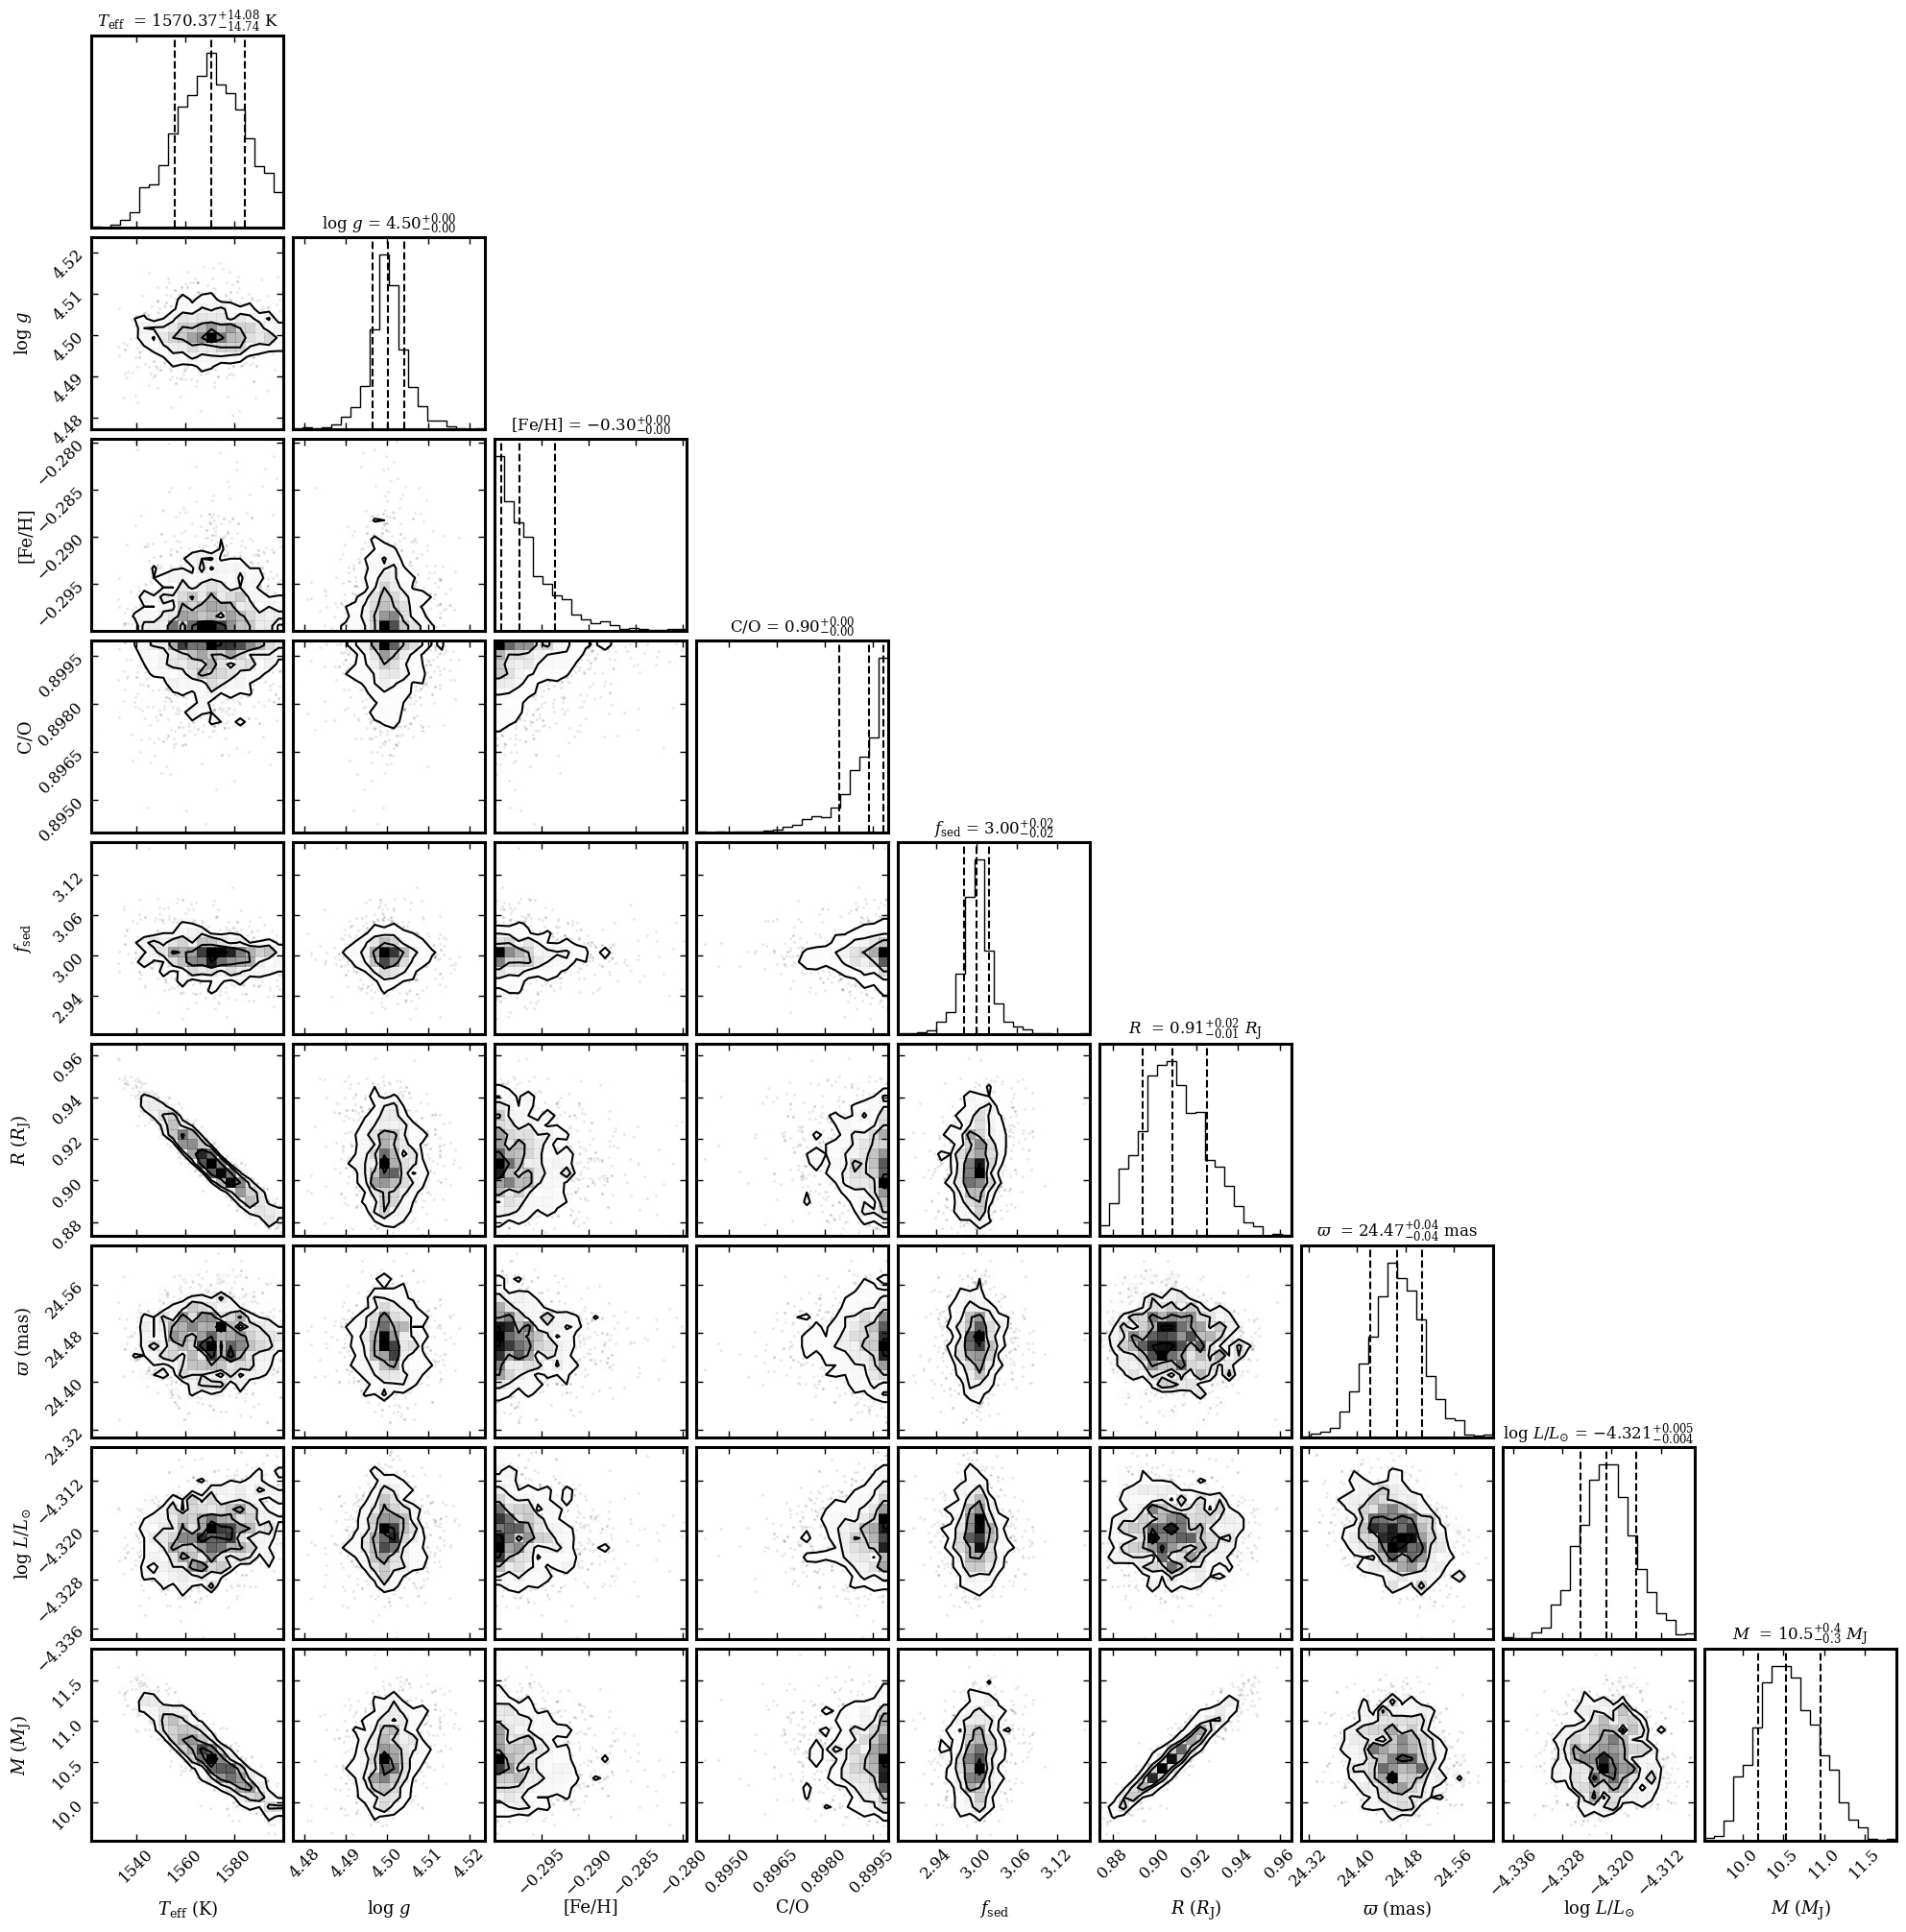

 [DONE]


In [8]:
samples = database.get_mcmc_spectra(tag=f'{planet_name}_{current_model}',
                                    random=30,
                                    wavel_range=None,
                                    spec_res=500.)
species.plot_posterior(tag=f'{planet_name}_{current_model}',
                       offset=(-0.3 , -0.3),
                       title_fmt=[ '.2f', '.2f', '.2f', '.2f',  '.2f', '.2f', '.2f', '.3f', '.1f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output=None)


In [9]:
best = database.get_median_sample(tag=f'{planet_name}_{current_model}')
read_model = species.ReadModel(model=current_model,
                               wavel_range=None)
modelbox = read_model.get_model(model_param=best,
                                spec_res=500.,
                                smooth=True)


In [18]:
objectbox = database.get_object(object_name=planet_name,
                                inc_phot=filter_list,
                                inc_spec=True)
objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)
residuals = species.get_residuals(datatype='model',
                                  spectrum=current_model,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=filter_list,
                                  inc_spec=True)
synphot = species.multi_photometry(datatype='model',
                                   spectrum=current_model,
                                   filters=filter_list,
                                   parameters=best)
synphot.open_box()


Getting object: HR 8799 c... [DONE]
Calculating synthetic photometry... [DONE]


/Users/nasedkin/python-packages/species/species/util/read_util.py:176: DeprecationWarning: The update_spectra function is deprecated and will be removed in a future release. Please use the update_objectbox function instead.
  warnings.warn(


Calculating residuals... [DONE]
Residuals (sigma):
   - Paranal/NACO.Lp: -0.61
   - Paranal/NACO.NB405: 1.15
   - Paranal/SPHERE.IRDIS_B_J: -34.33
   - Paranal/SPHERE.IRDIS_D_H23_2: -12.50
   - CHARIS: min: 1.16, max: 46.37
   - GRAVITY: min: -5.90, max: 2.48
   - SPHERE: min: -0.73, max: 23.92
Reduced chi2 = 66.55
Number of degrees of freedom = 291
Calculating synthetic photometry... [DONE]
Opening SynphotBox...
name = synphot
flux = {'Paranal/NACO.Lp': 7.71368715014549e-17, 'Paranal/NACO.NB405': 9.059650828096577e-17, 'Paranal/SPHERE.IRDIS_B_J': 5.926789877381343e-16, 'Paranal/SPHERE.IRDIS_D_H23_2': 4.554390853921128e-16}


Plotting spectrum...

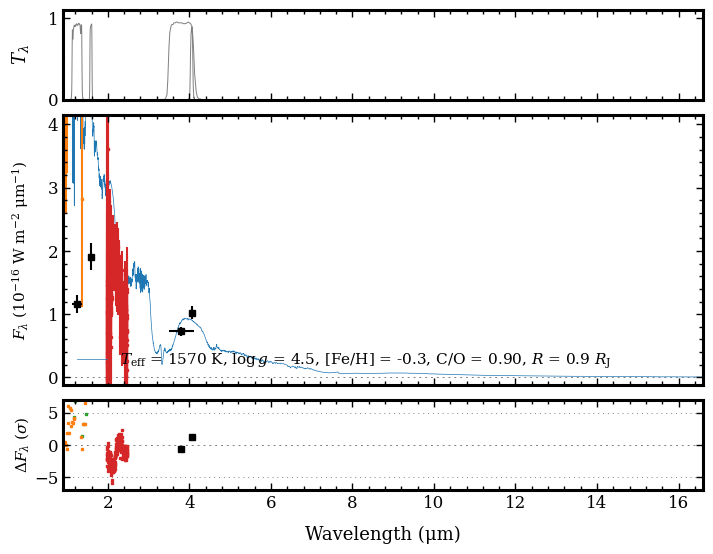

 [DONE]


(<Figure size 640x480 with 3 Axes>,
 (<Axes: ylabel='$F_\\lambda$ (10$^{-16}$ W m$^{-2}$ μm$^{-1}$)'>,
  <Axes: ylabel='$T_\\lambda$'>,
  <Axes: xlabel='Wavelength (μm)', ylabel='$\\Delta$$F_\\lambda$ ($\\sigma$)'>))

In [19]:
species.plot_spectrum(boxes=[ modelbox, objectbox],
                      filters=objectbox.filters,
                      residuals=residuals,
                      xlim=(0.9, 16.6),
                      ylim=(-1.15e-17, 4.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('linear', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'lower left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=None)